# $t$-Test Beispiel

In [1]:
import numpy as np
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family = 'serif')
matplotlib.rc('font', size = 14)
import matplotlib.pyplot as plt
from scipy import stats

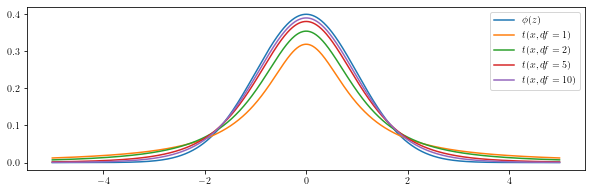

In [2]:
x_norm = np.arange(-5, 5, 0.01)
plt.figure(figsize=(10, 3))
plt.plot(x_norm, stats.norm.pdf(x_norm), label=r'$\phi(z)$')
for df in [1,2,5,10]:
    plt.plot(x_norm, stats.t.pdf(x_norm, df), label=rf'$t(x, df={df})$')
plt.legend()
plt.show()

## Einstichproben-t-Test: Malz

Herr Gosset ist in der QS von Guinnes und interessiert an einer gleichbleibenden Größe der Malzkörner.

Aus langjähriger Erfahrung weiß er, dass diese im Mittel $\mu_0 = 7mm$ groß sind.

In [3]:
mu_0 = 7

$H_0$: mittlere Größe hat sich nicht verändert, also $\mu = \mu_0$.

Wir wählen unser Signifikanzniveau $\alpha = 0.05$.

In [4]:
alpha = 0.05

Nun ziehen wir folgende Stichprobe mit 20 samples:

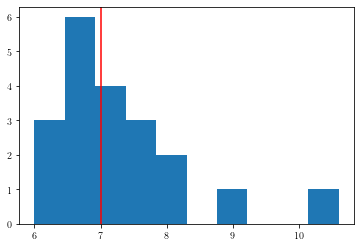

In [5]:
X = [6.1, 6.8, 6.5, 7.1, 7.7, 8.2, 6.0, 7.5, 6.6, 7.2, 7.5, 8.8, 10.6, 6.1, 6.6, 6.5, 6.5, 7.3, 7.3, 8.2]
#X = [7.2, 8.8, 8.7, 8.3, 8.9, 8.2, 9.1, 7.7, 7.2, 7.6, 6.4, 7.0, 10.1, 7.1, 8.0, 8.7, 10.4, 9.9, 6.8, 11.6]
n = len(X)
plt.hist(X)
plt.axvline(mu_0, color='r')
plt.show()

Sollten wir uns Sorgen machen, dass sich die Größe der Malzkörner geändert hat?

Welchen $p$-Wert für eine Verteilung min. so extrem wie die beobachtete können wir unter Annahme $H_0$ für die beobachtete Stichprobe ermitteln?

In [6]:
t = (np.mean(X) - mu_0) / (np.std(X, ddof=1) / len(X)**.5)
t

1.0426463748925703

In [7]:
p = 2*(1 - stats.t.cdf(abs(t), df=n-1))
p

0.31019784665558237

In [8]:
# or directly from stats:
stats.ttest_1samp(X, mu_0)

Ttest_1sampResult(statistic=1.04264637489257, pvalue=0.3101978466555825)

In [9]:
if p < alpha:
    print("H_0 verwerfen, d.h. Mittelwert hat sich geändert")
else:
    print("H_0 beibehalten, d.h. Mittelwert kann unverändert geblieben sein")

H_0 beibehalten, d.h. Mittelwert kann unverändert geblieben sein


In [10]:
# generate some X
# X = np.round(np.random.randn(20)*1.5 + 7, 1)
# print(list(X))

## Zweistichproben-t-Test: Malz

Herr Gosset ist in der QS von Guinnes und interessiert an einer gleichbleibenden Größe der Malzkörner.

Er hat vor längerer Zeit die Stichprobe $X$ und gerade die Stichprobe $Y$ gezogen, jeweils mit $n=20$ Beobachtungen.
Wir gehen außerdem davon aus, dass die Varianz der Grundgesamtheit $\sigma^2$ gleichgeblieben ist.

Nullhypothese: $H_0: \mu_X = \mu_Y$, d.h. wir nehmen an, dass die beiden Mittelwerte der Grundgesamtheiten gleich sind.

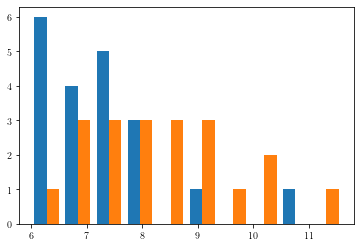

In [11]:
X = [6.1, 6.8, 6.5, 7.1, 7.7, 8.2, 6.0, 7.5, 6.6, 7.2, 7.5, 8.8, 10.6, 6.1, 6.6, 6.5, 6.5, 7.3, 7.3, 8.2]
Y = [7.2, 8.8, 8.7, 8.3, 8.9, 8.2, 9.1, 7.7, 7.2, 7.6, 6.4, 7.0, 10.1, 7.1, 8.0, 8.7, 10.4, 9.9, 6.8, 11.6]
n = len(X)
plt.hist([X, Y])
plt.show()

Sollten wir uns Sorgen machen, dass sich die Größe der Malzkörner geändert hat?

Welchen $p$-Wert für die Verteilungen min. so extrem wie die beobachtete können wir unter Annahme $H_0$ für die beobachtete Stichprobe ermitteln?

In [12]:
t = (np.mean(X) - np.mean(Y)) / ((np.var(X, ddof=1) + np.var(Y, ddof=1))/n)**.5
t

-2.9020337486845134

In [13]:
p = 2*(1 - stats.t.cdf(abs(t), df=2*n-2))
p

0.00613846927171835

In [14]:
# or directly from stats:
stats.ttest_ind(X, Y)

Ttest_indResult(statistic=-2.9020337486845134, pvalue=0.006138469271718238)